# Analysis

### Observed Trend 1:  The Sentiment Analysis of Media Tweets shows the valum and the polarity of the last 100 tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**. Running Sentiment Analysis on the tweets shows the overall polarity is positive or neutral.

### Observed Trend 2: The Overall Media Sentiment chart shows there is a significant diffrence for Polarity of tweets between CBS,  Fox, and BBC media which have the highest number of positive tweets and CNN and New York Times which have the highest number of negative tweets.

### Observed Trend 3: CNN and New York Times tweets carry the lowest percentage of positive Tweets and highest percentage of negative tweets.

In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#  API key
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Get all tweets from home feed
target_tags = ["BBC", "CBS", "CNN", "FOX", "NYTimes"]

media = []
dates = []
# Variables for holding sentiments
compound = []
positive = []
negative = []
neutral = []

# Loop through each hashtag
for tag in target_tags:
    
    public_tweets = api.user_timeline(tag, count=100)
    
    for tweet in public_tweets:
  
        results = analyzer.polarity_scores(tweet['text'])
        media.append(tag)
        dates.append(tweet["created_at"])
        compound.append(results["compound"])
        positive.append(results["pos"])
        negative.append(results["neg"])
        neutral.append(results["neu"])

tweet_dict = {
  "Media": media,
  "Compound": compound,
  "Positive": positive,
  "Negative": negative,
  "Neutral": neutral,
  "Tweet_date": dates 
  }

tweet_data = pd.DataFrame(tweet_dict)       
tweet_data

,Compound,Media,Negative,Neutral,Positive,Tweet_date
0,0.6114,BBC,0.050,0.756,0.194,Wed Jun 27 08:47:40 +0000 2018
1,0.0000,BBC,0.000,1.000,0.000,Wed Jun 27 08:01:05 +0000 2018
2,0.5106,BBC,0.051,0.791,0.158,Wed Jun 27 07:29:04 +0000 2018
3,0.4939,BBC,0.000,0.856,0.144,Wed Jun 27 07:01:05 +0000 2018
4,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 21:20:15 +0000 2018
5,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 19:05:08 +0000 2018
6,0.2960,BBC,0.074,0.792,0.134,Tue Jun 26 18:03:06 +0000 2018
7,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 17:02:02 +0000 2018
8,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 16:33:41 +0000 2018
9,0.0000,BBC,0.000,1.000,0.000,Tue Jun 26 16:00:15 +0000 2018


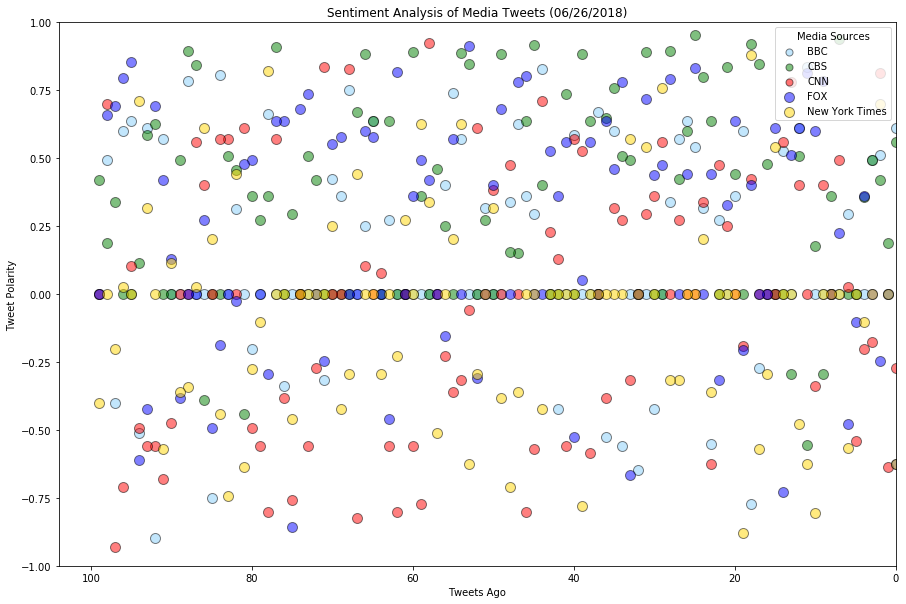

In [3]:
# Defining the X and Y: 
bbc_compound = tweet_data.loc[tweet_data['Media'] == "BBC"]
cbs_compound = tweet_data.loc[tweet_data['Media'] == "CBS"]
cnn_compound = tweet_data.loc[tweet_data['Media'] == "CNN"]
fox_compound = tweet_data.loc[tweet_data['Media'] == "FOX"]
newYorkTimes_compound = tweet_data.loc[tweet_data['Media'] == "NYTimes"]

# Build bubble plots:
plt.figure(figsize= (15,10))
plt.scatter(bbc_compound.index, bbc_compound['Compound'], color="lightskyblue", edgecolor="black"
            , label="BBC", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(cbs_compound.index-100, cbs_compound['Compound'], color="Green", edgecolor="black"
            , label="CBS", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(cnn_compound.index-200, cnn_compound['Compound'], color="Red", edgecolor="black"
            , label="CNN", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(fox_compound.index-300, fox_compound['Compound'], color="Blue", edgecolor="black"
            , label="FOX", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(newYorkTimes_compound.index-400, newYorkTimes_compound['Compound'], color="gold", edgecolor="black"
            , label="New York Times", alpha=0.5, s=round(100, 0), linewidths=1)


plt.title("Sentiment Analysis of Media Tweets (06/26/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim ([bbc_compound.index.max()+5, bbc_compound.index.min()])
plt.ylim (-1.0,1.0)

lgnd=plt.legend(loc="upper right", title="Media Sources", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]

plt.savefig("output_10_1.png")
plt.show()

In [4]:
compound_sum = tweet_data.groupby('Media')['Compound'].sum()
compound_sum.rename(
columns={
    0 : 'Media',
    1 : 'Polarity'
  },
  inplace=True
)
compound_sum

Media
BBC        14.4484
CBS        33.9176
CNN        -1.3840
FOX        22.3222
NYTimes    -5.2590
dtype: float64

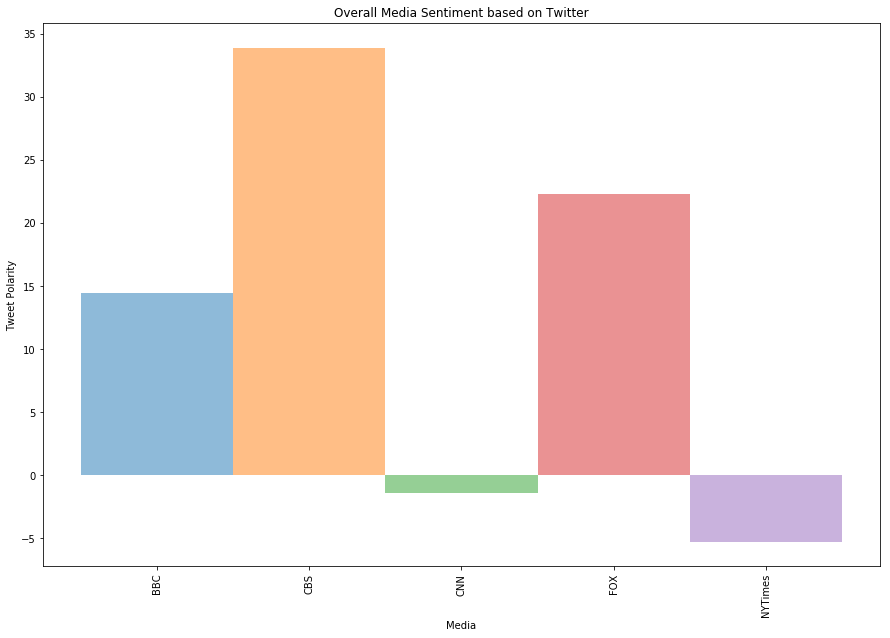

In [5]:
compound_sum = tweet_data.groupby('Media')['Compound'].sum()
plt.figure(figsize= (15,10))
sentiment_chart = compound_sum.plot(kind="bar", width=1, alpha=0.5)

# for Media in compound_sum:
#      height = Media.get_height()
#      ax.text(Media.get_x() + Media.get_width()/ 2, height + 5,
#      ha='center', va='bottom')

plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel("Tweet Polarity")
plt.savefig("output_13_1.png")
plt.show()